In [3]:
import pandas as pd
import seaborn as sns

In [21]:
df = pd.read_csv('data.csv')

In [81]:
df.diagnosis = df.diagnosis.map({'M':1, 'B':0})

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [24]:
df = df.drop(columns=['Unnamed: 32', 'id'])

миссингов нет, это хорошо

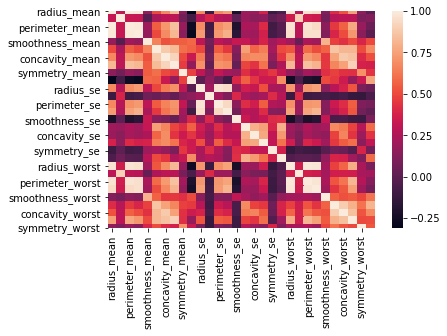

In [25]:
sns.heatmap(df.corr())

фич очень много, они есть сильно скоррелированные. Избавлюсь от них перед продолжением анализа

In [57]:
`
to_del = []
for a,b in pairs:
    if a not in to_del:
        to_del.append(b)
    to_del = list(set(to_del))
df = df.drop(columns=to_del)

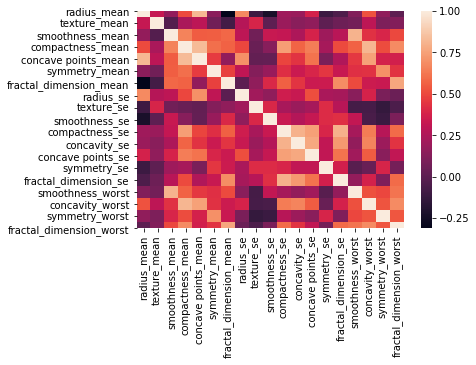

In [59]:
# Построим еще разок матрицу корреляций
sns.heatmap(df.corr())

Wall time: 1min 15s


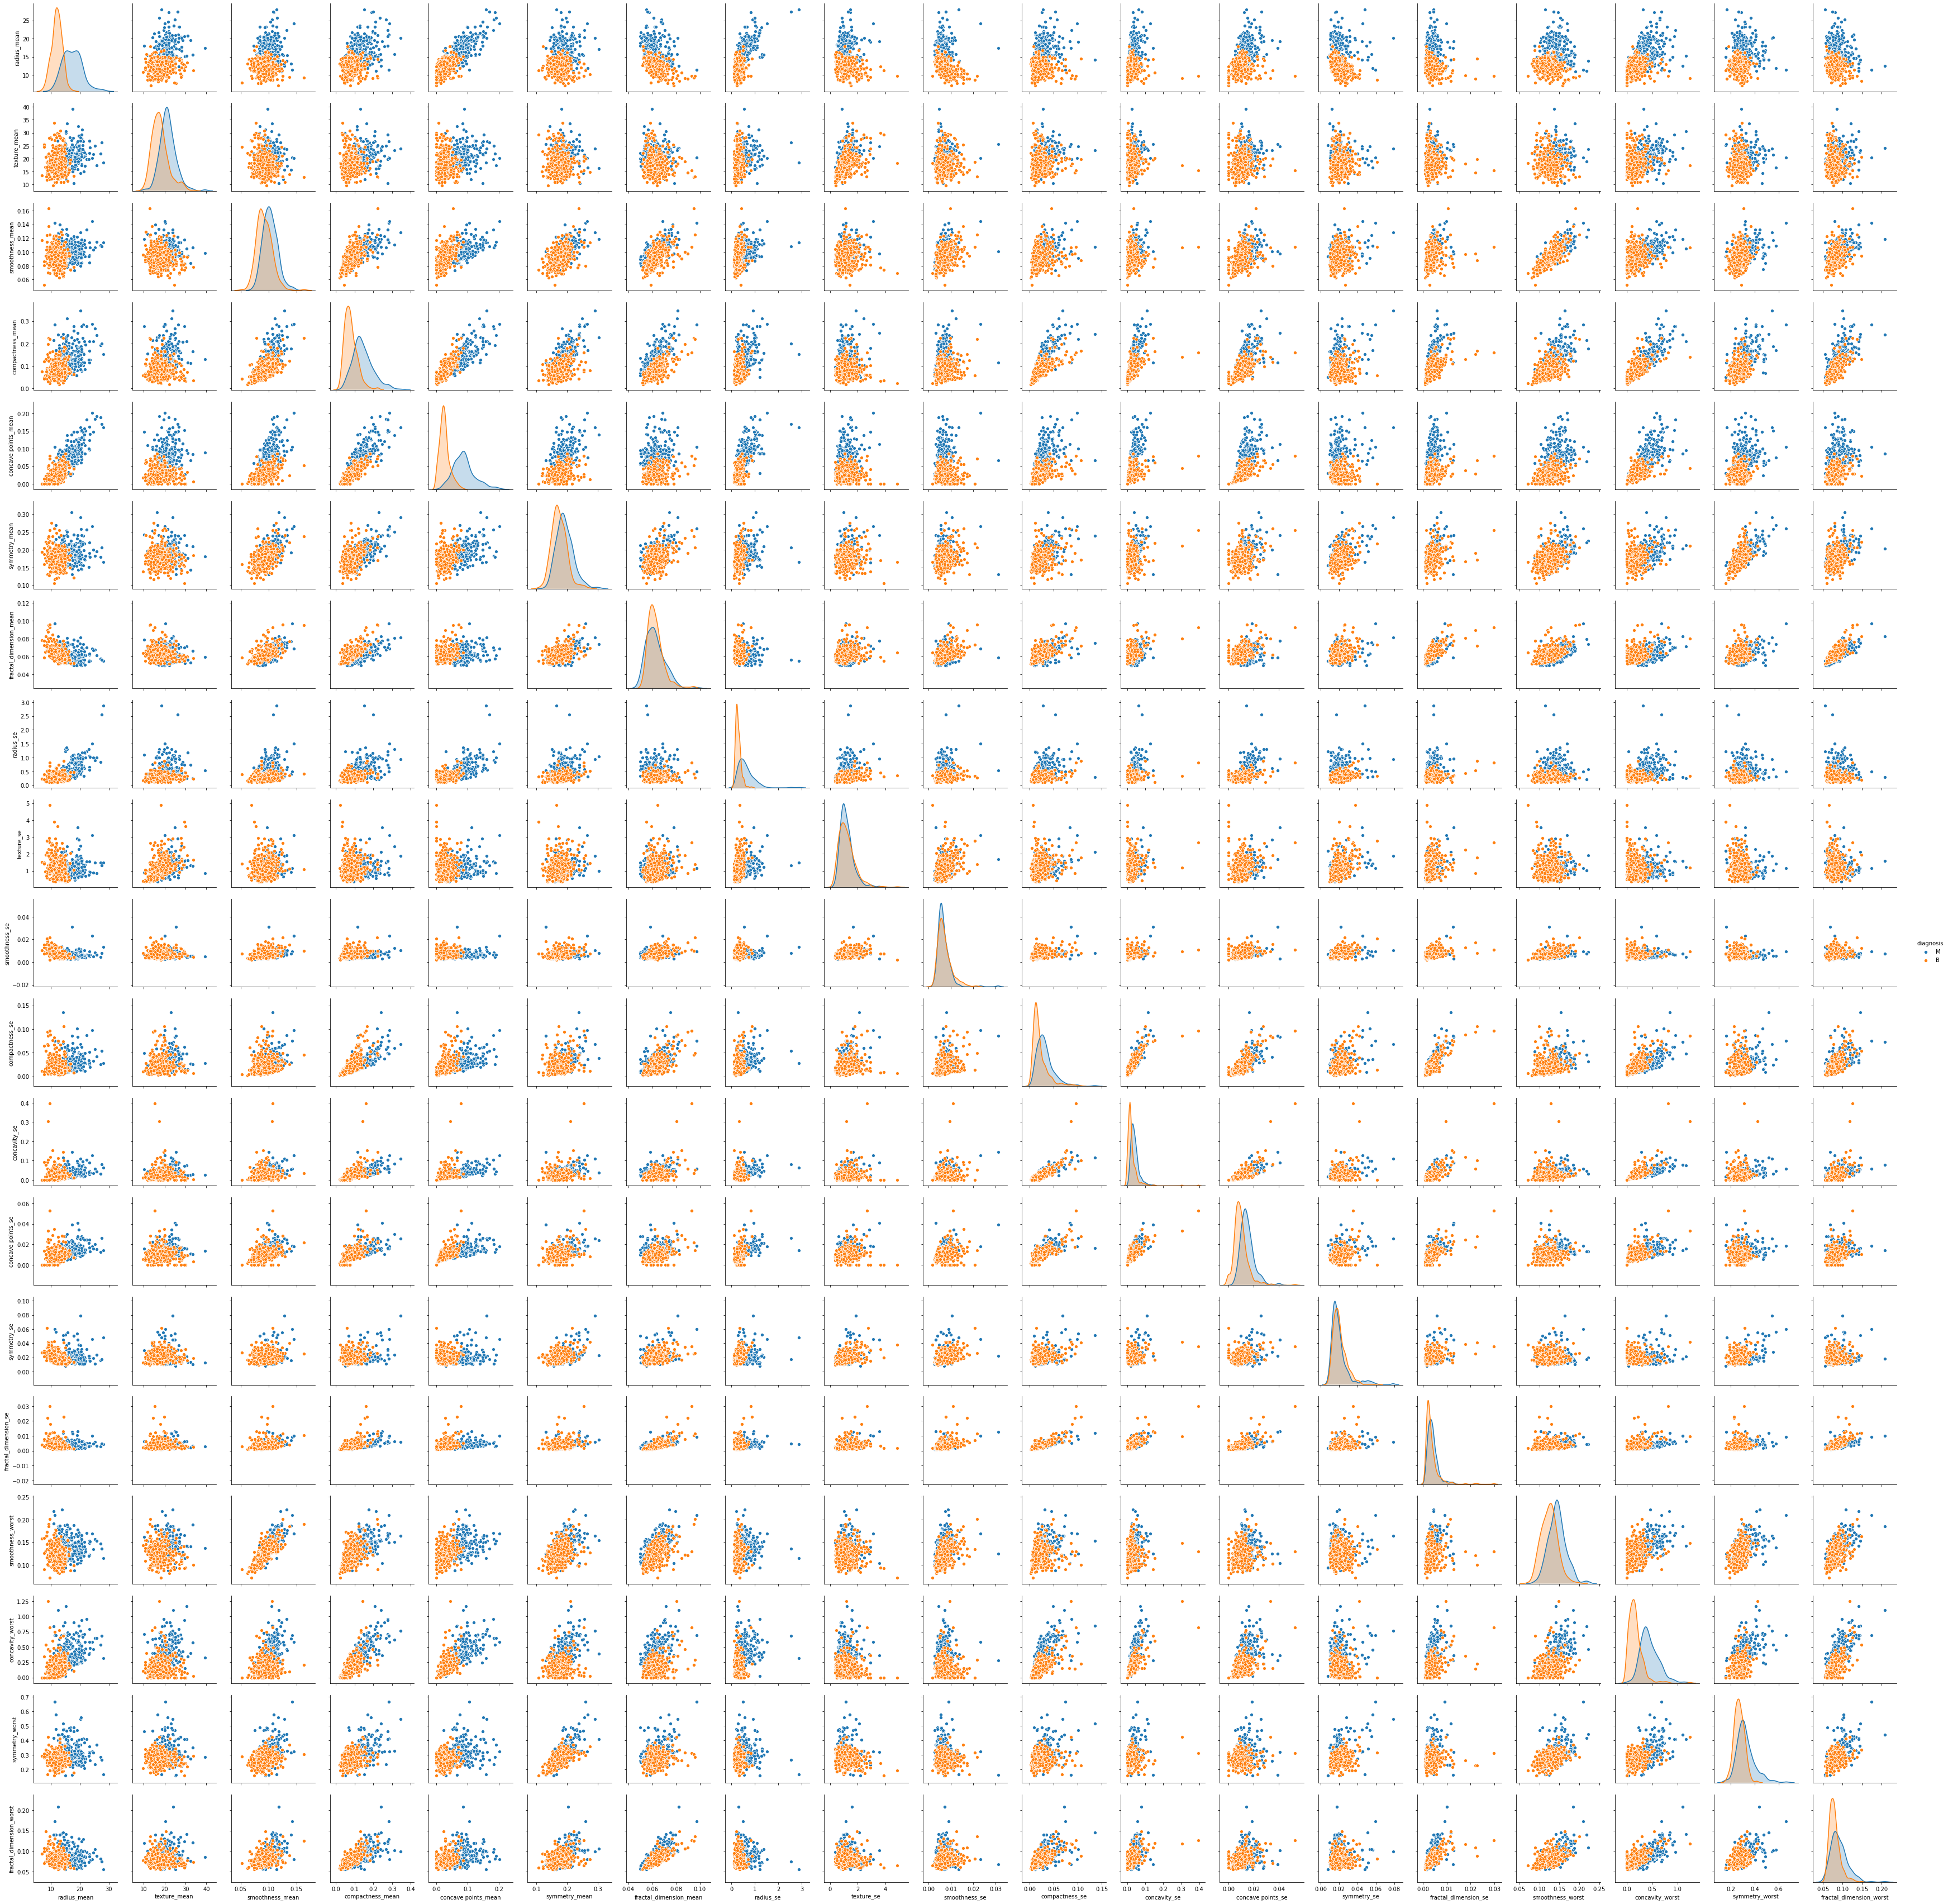

In [65]:
%%time
sns.pairplot(df, hue='diagnosis');

на первый взгляд многие пары дают возможность линейно разделить классы

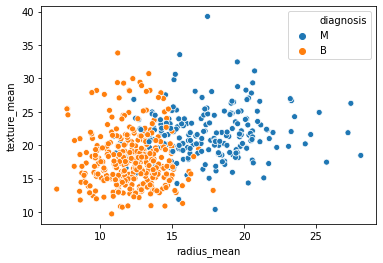

In [71]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue= 'diagnosis',data=df )

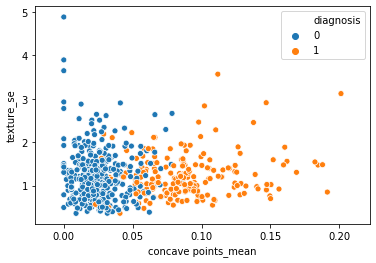

In [82]:
sns.scatterplot(x='concave points_mean', y='texture_se', hue= 'diagnosis',data=df )

разделим классы на глазок, это будет наш базовый прогноз

In [87]:
class my_baseline():
    def fit(*args):
        pass
    def predict(self, X):
        return (X['concave points_mean']>0.05)*1

приступим к моделированию

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [104]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}\nAUC: {:.3f} ".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual),
        roc_auc_score(actual,prediction)
    ))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='diagnosis'), df.diagnosis,test_size=0.3)

In [117]:
baseline= my_baseline()
quality_report(y_test, baseline.predict(X_test))

Accuracy: 0.889
Precision: 0.844
Recall: 0.903
f1_score: 0.872
AUC: 0.885 


отшкалируем переменные

In [118]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
reg1 = LogisticRegression(solver='lbfgs')
reg1.fit(X_train, y_train)
quality_report(y_test, reg1.predict(X_test))

Accuracy: 0.965
Precision: 1.000
Recall: 0.917
f1_score: 0.957
AUC: 0.971 


качество выросло по сравнению с базовой линией это очень хорошо

посмотрим на значимость переменных

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


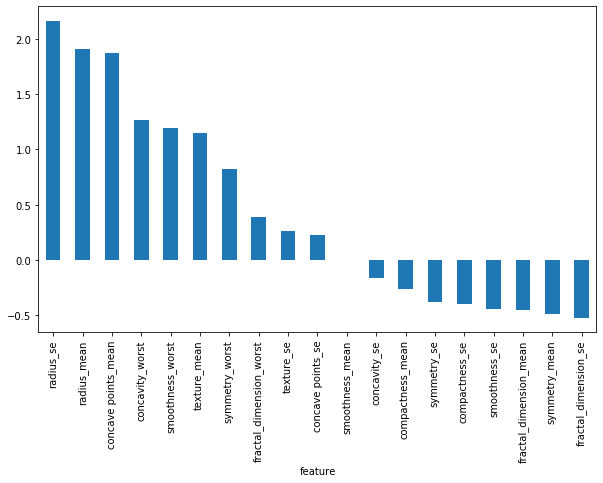

In [129]:
featureImportance = pd.DataFrame({"feature":df.drop(columns='diagnosis').columns.values ,
                                  "importance": reg1.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [132]:
reg2 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100)
reg2.fit(X_train, y_train)
quality_report(y_test, reg2.predict(X_test))

Accuracy: 0.971
Precision: 0.986
Recall: 0.944
f1_score: 0.965
AUC: 0.973 


приросли в качестве, но незначительно. Посмотрим еще раз на коэффициенты

C:\Users\Asus\Miniconda3\envs\otus_ml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


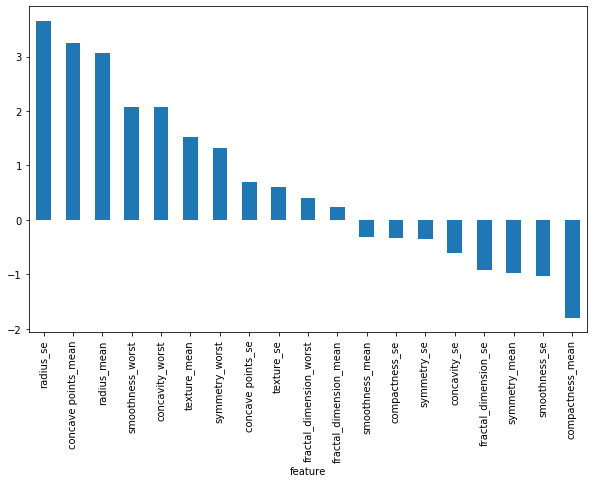

In [135]:
featureImportance = pd.DataFrame({"feature":df.drop(columns='diagnosis').columns.values ,
                                  "importance": reg2.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));

In [138]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

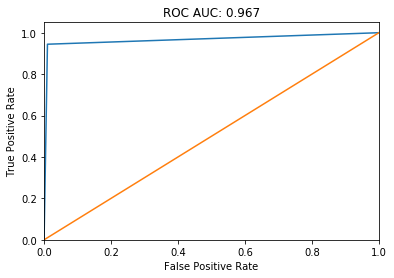

In [141]:
plot_roc_curve(reg2.predict(X_test), y_test)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
params={'n_neighbors': [i+1 for i in range(100)]}
grid = RandomizedSearchCV(knn,params, cv=5, n_iter=40)
grid.fit(X_train, y_train)
quality_report(y_test, grid.predict(X_test))

Accuracy: 0.942
Precision: 0.984
Recall: 0.875
f1_score: 0.926
AUC: 0.950 


In [153]:
grid.best_params_

{'n_neighbors': 7}

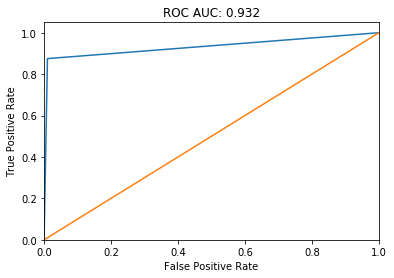

In [152]:
plot_roc_curve(grid.predict(X_test), y_test)